# النمذجة 

In [ ]:
#تحميل البيانات 
import pandas as pd
df= pd.read_csv("./data/houseprice1.csv")

In [ ]:
# اكبر 7 ارتباطات 
cormat.nlargest(7)

SalePrice      1.000
OverallQual    0.817
TotalSF        0.773
GarageCars     0.681
TotalBath      0.673
GarageArea     0.651
1stFlrSF       0.597
Name: SalePrice, dtype: float64

![](https://thumbs.gfycat.com/ZealousBewitchedHapuka-size_restricted.gif)

## الانحدار الخطي 

$\large \hat y= \beta_0 + \beta_1 x$

![](https://miro.medium.com/max/1280/1*fX95txC9xSwSPeP6ch2nmg.gif)

## تقسيم البيانات 

![](https://i.ibb.co/kh7X1Fq/Train-test-1.jpg)

In [ ]:
from sklearn.model_selection import train_test_split
X=df.OverallCond.values.reshape(-1,1)
y=df.SalePrice.values.reshape(-1,1)

X_train, X_test, y_train, y_test= train_test_split( X, y , test_size=.3, random_state=42)

In [ ]:
import statsmodels.api as sm
lrg = sm.OLS(y_train, X_train).fit()
print(lrg.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.959
Method:                 Least Squares   F-statistic:                          2.408e+04
Date:                Mon, 10 Aug 2020   Prob (F-statistic):                        0.00
Time:                        09:57:19   Log-Likelihood:                         -2345.8
No. Observations:                1018   AIC:                                      4694.
Df Residuals:                    1017   BIC:                                      4698.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

-  reject the null hypothesis that the coefficient is equal to 0 and conclude that x1 is an important independent variable to utilize.|

In [ ]:
# تحميل وظيفة الانحدار الخطي
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()


In [ ]:
# تدريب البيانات الخاصة بالتدريب 
lreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# تحديد درجة الانحدار 
lreg.coef_ #.round(3)

array([[-0.00954596]])

In [ ]:
# y تحديد تقاطع محور 
lreg.intercept_ #.round(3)

array([12.08808385])


###   $$\large \hat y= \beta_0 + \beta_1 x$$

 : $$\large \hat y=   +  x$$

###  التنبؤ

$$\Large \text{y_pred} = model.\text{intercept_} + model.\text{coef_}  \color{red}{x}$$

In [ ]:
y_pred=lreg.predict(X_test)

In [ ]:
# الوظيفة العكسية
np.log1p(np.expm1(1))

1.000

In [ ]:
# مقارنة البيانتات الأصلية وتلك التي تم التنبؤ بها
pd.options.display.precision=3
df_pred=pd.DataFrame( {"Actual_P": y_test.ravel(), "Predicted_P": y_pred.ravel() })
df_pred.head()

,Actual_P,Predicted_P
0,12.123,12.031
1,12.122,12.040
2,11.884,12.040
3,11.653,12.050
4,11.339,12.059


In [ ]:
df_pred.keys()

Index(['Actual_P', 'Predicted_P'], dtype='object')

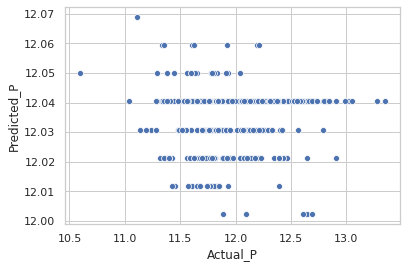

In [ ]:
# الرسم البياني لأسعار العقارات الأصلية وتلك التي تم التنبؤ بها
import seaborn as sns
# sns.set()
_=sns.scatterplot("Actual_P",  "Predicted_P", data=df_pred)

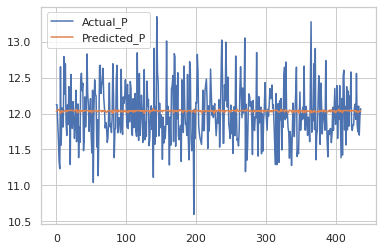

In [ ]:
#  تباين القيم الحالية والت يتم التنبؤ بها
df_pred.plot()

### القياس 

In [ ]:
# تحديد درجة تعبير قيم تباين  البيانات التي تم التنبؤ بها عن قيم تباين المتغيرات 
# بيانات التدريب 
from sklearn  import metrics
f"  Score  :  {lreg.score(X_train, y_train):.3f}"


'  Score  :  0.001'

In [ ]:
# بيانات الاختبار 
f"  Score  :  {lreg.score(X_test, y_test):.3f}"

'  Score  :  -0.006'

## MAE
![](https://i.imgur.com/tqnei6J.jpg)

$\Large  MAE = \frac 1 n \sum_{i=1}^N |Y_i - \hat Y_i|$

$\Large  MAE = \frac 1 n \sum_{i=1}^N |actual  - predicted|$

- MAE measures the average magnitude of the errors in a set of predictions, without considering their direction.

In [ ]:
# تقدير معدل الخطأ  فيما بين القيم الحقيقة وتلك لاتي تم التنبؤ بها
f"  Mean Absolute Error  MAE  :  {metrics.mean_absolute_error(y_test, y_pred):.3f}"

'  Mean Absolute Error  MAE  :  0.316'

$\Large  MSE = \frac 1 n \sum_{i=1}^N (Y_i - \hat Y_i)^2$

![](https://i.imgur.com/mLn8AeW.jpg)

In [ ]:
f"  Mean Squared Error  :  {metrics.mean_squared_error(y_test, y_pred):.3f}"

'  Mean Squared Error  :  0.156'

$\Large  MSE = \sqrt {\frac 1 n \sum_{i=1}^N (Y_i - \hat Y_i)^2}$

- RMSE: 
  - average magnitude of the error.
  - RMSE should be more useful when large errors are particularly undesirable.

  
it allows us to estimate the standard deviation σ of the error for a typical single observation rather than some kind of “total error”

( it just becomes more accurate as we increase the number of observations)
- RMSE is a good way to answer the question: “How far off should we expect our model to be on its next prediction?”
$\large  Observed_{value}= predicted_{value} + \text{ predicatbly Distributed random noise with mean Zero} $
- The random noise here could be anything that our model does not capture

- Taking the square root of the average squared errors has some interesting implications for RMSE. Since the errors are squared before they are averaged, the RMSE gives a relatively high weight to large errors. This means the RMSE should be more useful when large errors are particularly undesirable.  



In [ ]:
#  مقياس مفيد في حالة ما إذا طان لدينا قيم متطرفة غير مرغوب فيها
f"  RMSE  :  {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.3f}"

'  RMSE  :  0.394'

$\Large  R^2= \frac {Variance_{predicte\_y}}{ Variance_{Actual\_y}}$

In [ ]:
# R2: is the Coefficient of Determination which measures the amount of variation explained by the (least-squares) Linear Regression.
f"  R2:  :  {metrics.r2_score(y_test, y_pred):.3f}"

'  R2:  :  -0.006'

- When we compare the R2 Score with the Explained Variance Score, we are basically checking the Mean Error; so if R2 = Explained Variance Score, that means: The Mean Error = Zero!

In [ ]:
metrics.explained_variance_score(y_test, y_pred)

0.003

### معالجة البيانات 
#### سلم البيانات

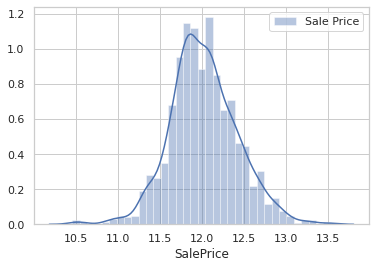

In [ ]:
# التخطيط البياني لأسعار العقارات
_=sns.distplot(df.SalePrice, label="Sale Price")
# _=sns.distplot(df_train.OverallQual, label="OverAll Quality")
plt.legend()

 standard score   :
طريقة احتساب    
$\large  z= \frac{x-\mu}{\sigma}$

In [ ]:
# تعديل    معدل الأسعار وقيمة الاتحدار المعياري 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 

df["Scaled_OverallQal"]=scaler.fit_transform(df[["OverallQual"]])



In [ ]:
df["Scaled_SalePrice"]=scaler.fit_transform(df[["SalePrice"]])


In [ ]:
df[["Scaled_OverallQal", "Scaled_SalePrice"]].head()

,Scaled_OverallQal,Scaled_SalePrice
0,0.658,0.562
1,-0.070,0.214
2,0.658,0.736
3,0.658,-0.437
4,1.387,1.017


In [ ]:
# التحقق من تعديل الباينات
df.Scaled_SalePrice.std()  , df.Scaled_SalePrice.mean()

(1.000, 0.000)

In [ ]:
# حفظ البيانات
df.to_csv("./data/housePrice2.csv")